**Display the MNIST handwritten images**

['x_test', 'x_train', 'y_train', 'y_test']
Training data shape: (60000, 28, 28), Labels shape: (60000,)
Test data shape: (10000, 28, 28), Labels shape: (10000,)


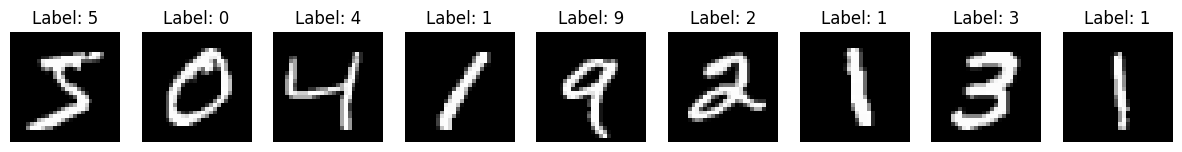

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .npz file
data = np.load("/content/drive/MyDrive/ColabNotebooks/Mtech/MTech2Sem/DLT/Exp1/mnist.npz")

# Check the available keys in the file
print(data.files) # Output will show keys like ['x_train', 'y_train', 'x_test', 'y_test']

x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

print(f"Training data shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Labels shape: {y_test.shape}")

# Display 9 sample images from the dataset
num_images = 9
plt.figure(figsize=(15, 3))
for i in range(num_images):
  plt.subplot(1, 9, i + 1)
  plt.imshow(x_train[i], cmap='gray') # Display grayscale image
  plt.title(f"Label: {y_train[i]}")
  plt.axis("off")
plt.savefig("image_grid.png")
plt.show()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8794 - loss: 0.4215
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9633 - loss: 0.1227
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9769 - loss: 0.0766
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9830 - loss: 0.0585
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9862 - loss: 0.0435
313/313 - 1s - 5ms/step - accuracy: 0.9755 - loss: 0.0775

Test accuracy: 0.9755
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


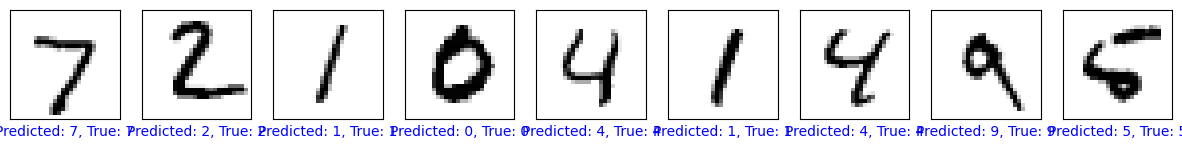

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset (handwritten digits 0-9)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to [0, 1] range for better training
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the neural network model
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)), # Flatten 28x28 images to 1D
keras.layers.Dense(128, activation='relu'), # Hidden layer with 128 neurons
keras.layers.Dense(10, activation='softmax') # Output layer (10 classes)
])

# Compile the model
model.compile(optimizer='adam',

loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

# Train the model on the training data
model.fit(x_train, y_train, epochs=5)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

# Make predictions
predictions = model.predict(x_test)

# Plot some predictions
def plot_image(i, predictions_array, true_label, img):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  true_label = true_label[i]
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel(f"Predicted: {predicted_label}, True: {true_label}", color=color)

# Display a few sample predictions
num_rows, num_cols = 1, 9
plt.figure(figsize=(15, 3))
for i in range(num_rows * num_cols):
  plt.subplot(num_rows, num_cols, i + 1)
  plot_image(i, predictions[i], y_test, x_test[i])
plt.savefig("image_predict_grid.png")
plt.show()